# Third Attempt: Barplots

The third approach involved creating an animated series of bar plots. The numbers for sub-districts were aggregated into their respective districts, simplifying the process due to the available data. This new plot enhanced clarity and understandability, as the districts were not only differentiated by color but also represented as distinct bars. Overemphasized sub-districts, like the government district, were somewhat leveled out by incorporating them into the relative numbers for the entire district. However, this depiction suffered from the same limitation as the first attempt depicted in {numref}`fig:crime-dev-final`, as it didn't allow the simultaneous viewing of the entire development.

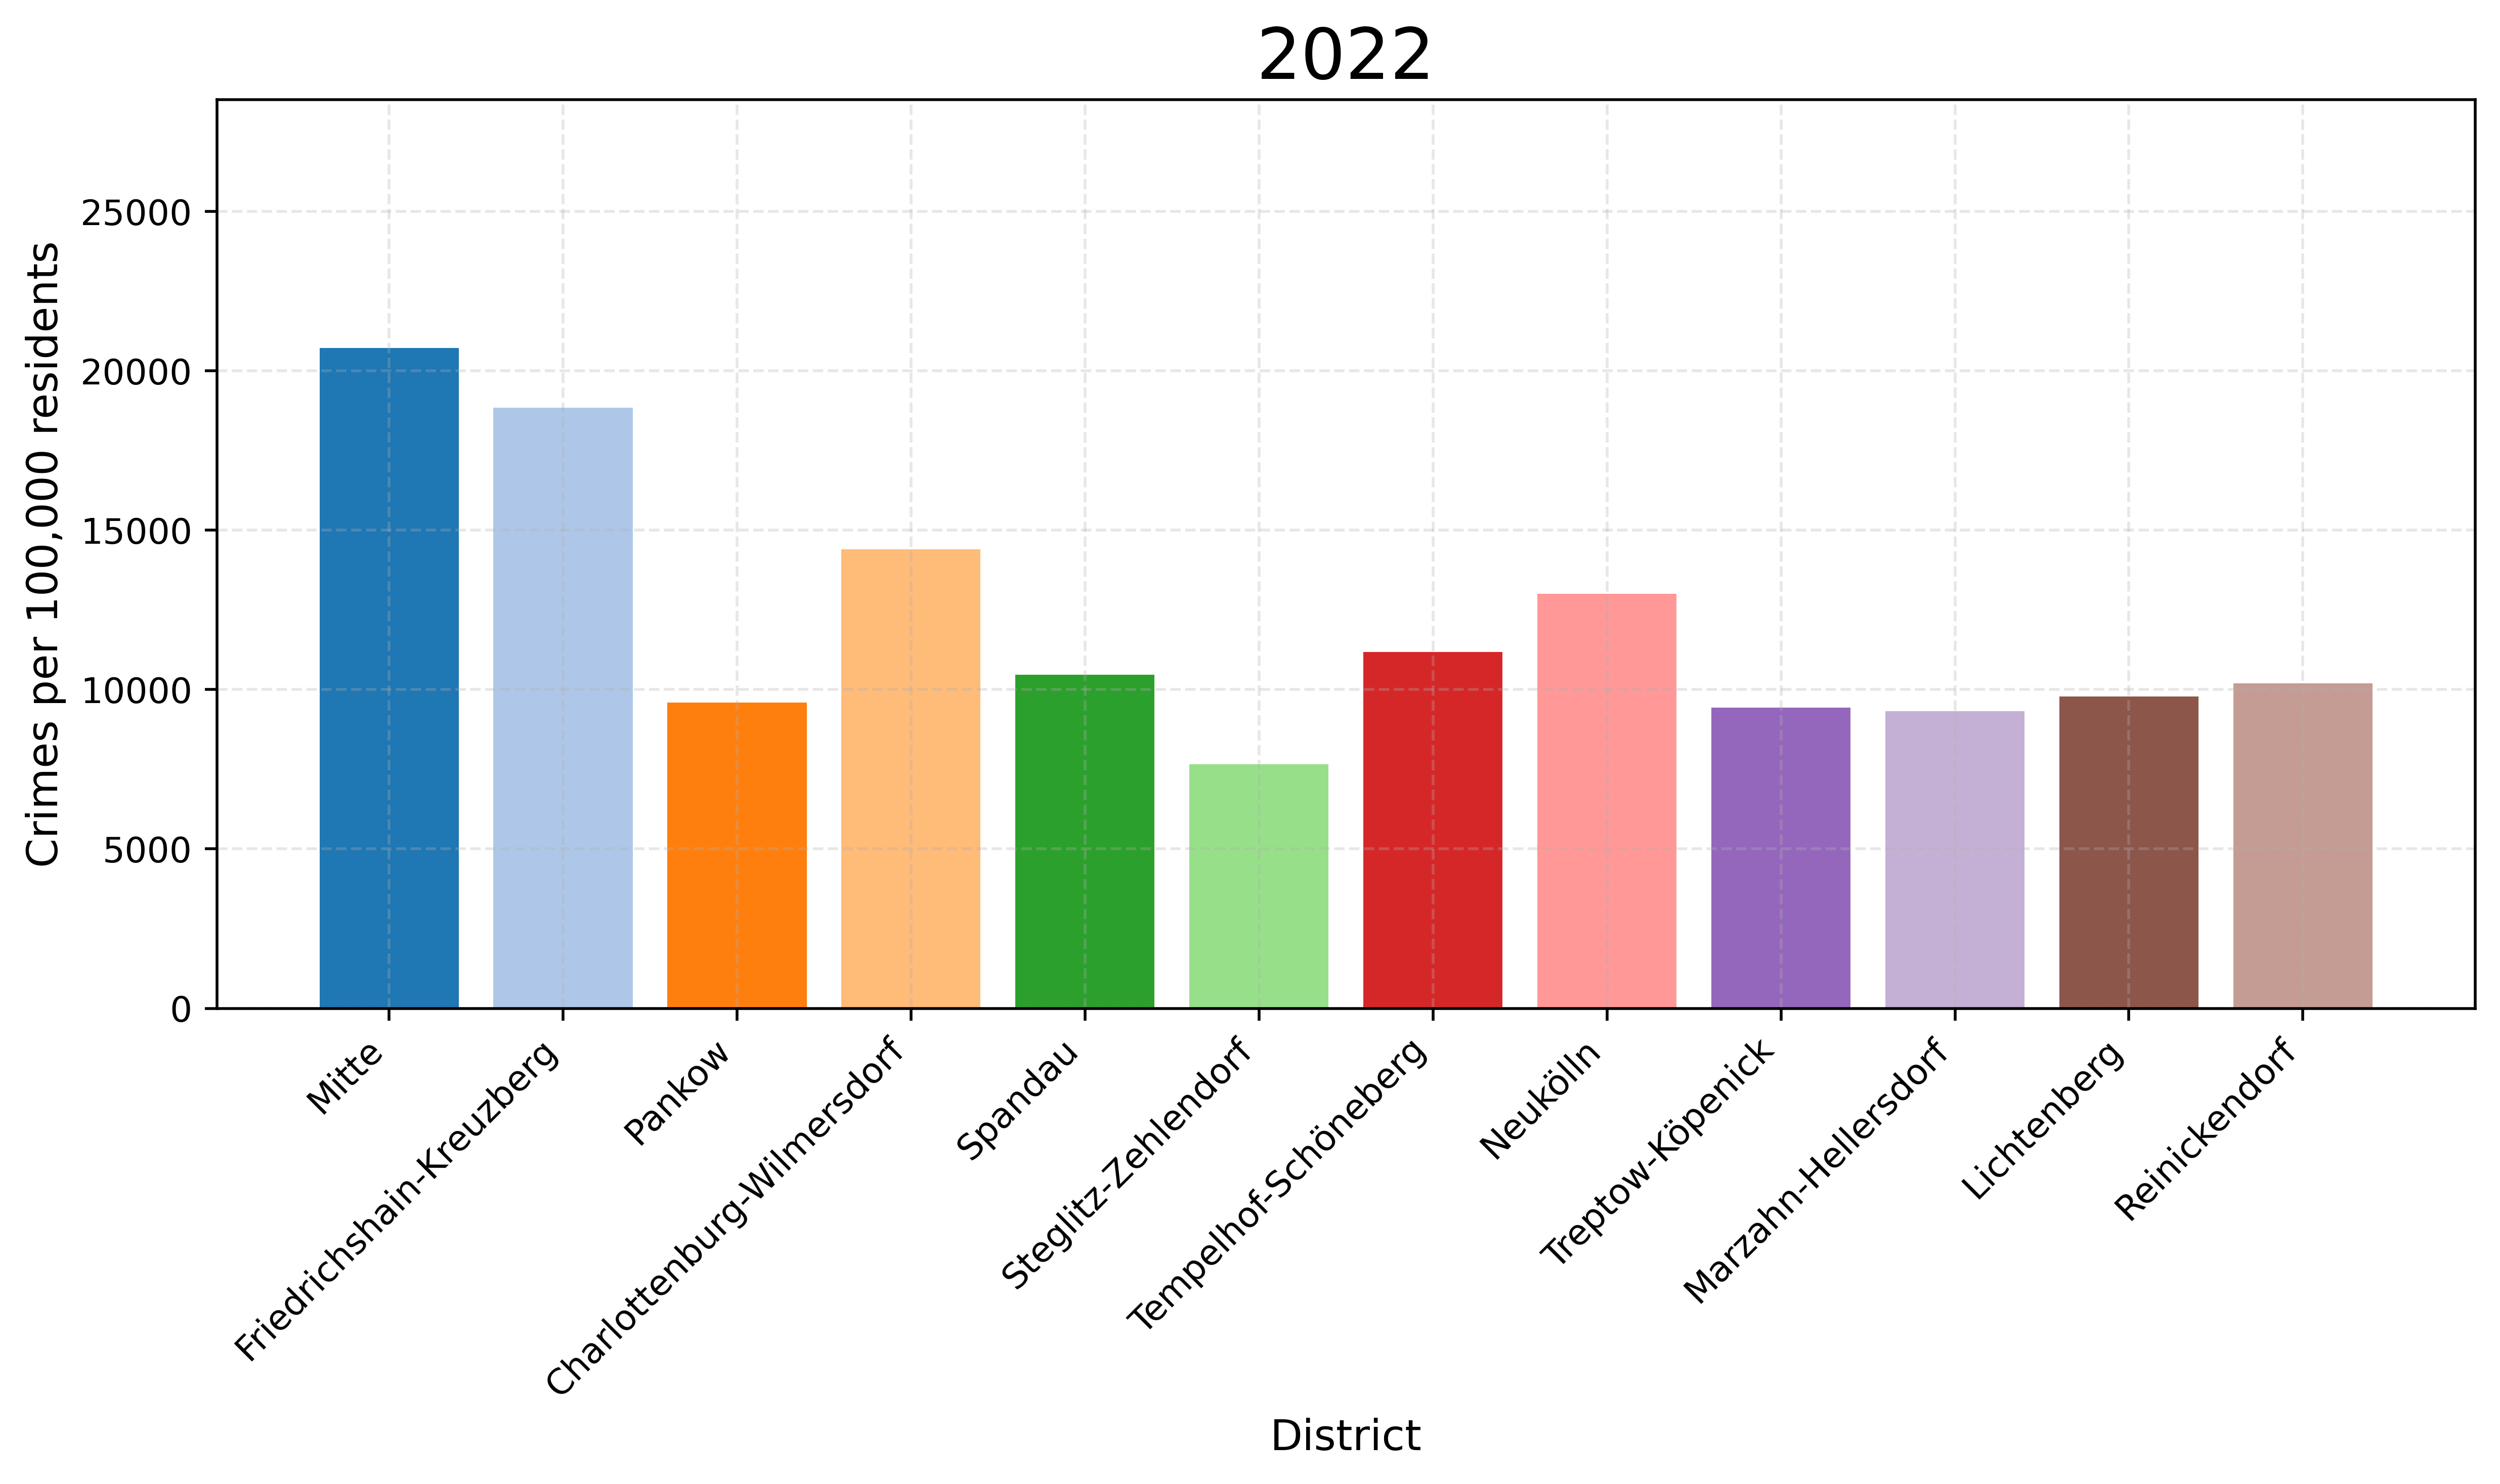

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from IPython import display
from IPython.display import display, clear_output
import time

#import os

#output_dir = "output_heatmaps"  # Create a directory to save the output heatmaps
#os.makedirs(output_dir, exist_ok=True)

bezirkskriminalitaet = pd.read_pickle("../data/08_kriminalitaet_auf_bezirksebene_2013_bis_2022.pkl")
bezirkskriminalitaet['BEZ'] = bezirkskriminalitaet['LOR-Schlüssel (Bezirksregion)'].astype(str).str[:2]

# Set the maximum value for the slider
max_year = 2022
min_year = 2013

# Calculate the maximum crime value across all years to set a common y-axis limit
max_crime_value = bezirkskriminalitaet["Straftaten \n-insgesamt-"].max()

def plot_map(year):
    year_df = bezirkskriminalitaet[bezirkskriminalitaet['Year'] == year]

    fig, ax = plt.subplots(figsize=(10, 6))

    # Assign different colors to each bar
    colors = plt.cm.tab20(range(len(year_df)))

    ax.bar(year_df["Bezeichnung (Bezirksregion)"], year_df["Straftaten \n-insgesamt-"], color=colors)

    ax.set_title(f"{year}", fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.xlabel("District", fontsize=12)
    plt.ylabel("Crimes per 100,000 residents", fontsize=12)
    plt.ylim(0, max_crime_value+1000)  # Set a common y-axis limit for all years
    plt.grid(True, linestyle='--', alpha=0.3, zorder=0)  # Add the grid in the background
    plt.tight_layout()
    plt.gcf().set_dpi(500)

    #output_filename = os.path.join(output_dir, f"heatmap_{year}.png")
    #plt.savefig(output_filename, dpi=500)  # Save the figure as an image


    return fig

# Create the animation
for year in range(2013, 2023):
    fig = plot_map(year)

    display(fig)
    clear_output(wait=True)

    #time.sleep(0.4)

    plt.close(fig)


```{figure} figures/barplots.gif
---
height: 500px
name: fig:crime-dev-barplot
---
Temporal development (2013-2022) of crimes per 100,000 residents
per Berlin districts - barplots
```